In [1]:
import numpy as np
import os

In [4]:
from tensorflow.keras.preprocessing.image import smart_resize as srs

In [19]:
import tensorflow as tf

In [6]:
import cv2

In [63]:
features = []
targets = []

address = os.listdir("dataset/with_mask")
for each_image in address:
    img = cv2.imread("dataset/with_mask/"+each_image)
    if img is None: continue
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (128, 128))
    img = tf.image.per_image_standardization(img)
    features.append(img)
    targets.append(1)


address = os.listdir("dataset/without_mask")

for each_image in address:
    img = cv2.imread("dataset/without_mask/"+each_image)
    if img is None: continue
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.convert_image_dtype(img, tf.float32)
    img = tf.image.resize(img, (128, 128))
    img = tf.image.per_image_standardization(img)
    features.append(img)
    targets.append(0)

In [65]:
features = np.array(features)
features.shape

(3810, 128, 128, 1)

In [66]:
dataGenerator=tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)

In [67]:
dataGenerator.fit(features)

In [68]:
targets = tf.keras.utils.to_categorical(targets)

In [87]:
type(features[0][0])

numpy.ndarray

In [71]:
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

In [138]:
model = Sequential()
model.add(Conv2D(16, (3, 3), activation="relu", input_shape=(128, 128, 1)))
model.add(Flatten())
model.add(Dense(512, activation="relu"))
model.add(Dense(64, activation="relu"))
model.add(Dense(2, activation="softmax"))

In [139]:
from tensorflow.keras.optimizers import Adam

In [140]:
model.compile(Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])

In [141]:
model.fit(features, targets, epochs=1)

120/120 [==============================] - 114s 923ms/step - loss: 1.7814 - accuracy: 0.7598


In [142]:
model_json_file = model.to_json()
op_file = open("model_in_json.json", "w")
op_file.write(model_json_file)
op_file.close()

model.save_weights("model_weights.h5")

In [136]:
face_crop = cv2.CascadeClassifier('C:\\ProgramData\\Anaconda3\\Lib\\site-packages\\cv2\\data\\haarcascades_frontalface_default.xml')

In [92]:
from tensorflow.keras.preprocessing.image import img_to_array

In [1]:
from tensorflow.keras.models import model_from_json

In [2]:
from tensorflow import keras
import tensorflow as tf

In [3]:
import cv2

In [4]:
import numpy as np

In [5]:
file=open("model_in_json.json","r")
model=file.read()
model=model_from_json(model)
model.load_weights("model_weights.h5")
file.close()

In [9]:
# video = cv2.VideoCapture(0)
# video.set(3, 128)
# video.set(4, 128)
# video.set(10, 170)

# while True:
# msg, inp_img = video.read()

inp_img = cv2.imread("abc.jpg")
print(inp_img.shape)
# grey_img = cv2.cvtColor(inp_img, cv2.COLOR_BGR2GRAY)
# diff_faces = face_crop.detectMultiScale(grey_img, 1.20, 3)
# for (x, y, w, h) in faces:
# one_img = grey_img[y:y+h, x:x+w]
# one_img = cv2.resize(grey_img, (128, 128))
# if np.sum([one_img])!=0:
img = tf.image.rgb_to_grayscale(inp_img)
img = tf.image.convert_image_dtype(img, tf.float32)
img = tf.image.resize(img, (128, 128))
img = tf.image.per_image_standardization(img)
prediction = model.predict(np.array([img for i in range(1)]))
img = np.array(img)
# if prediction[0][0]<prediction[0][1]: 
#     cv2.putText(img, 'Mask Worn ! ('+str(int(prediction[0][1]))+'%)' , (0, 0), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 255, 0), 2)
# else:
#     cv2.putText(img, 'NO Mask Worn !!! ('+str(int(prediction[0][0]))+'%)' , (0, 0), cv2.FONT_HERSHEY_SIMPLEX,1, (0, 0, 255), 2)
# else:
#     cv2.putText(img,"No Face Recognised",(10,10),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
# cv2.putText(img,"Press 'e' to end",(200,470),cv2.FONT_HERSHEY_SIMPLEX,1,(0,0,255),2)
# cv2.imshow("Corona Mask Detector",img)
#     if cv2.waitKey(1) == ord('e'):
#         break
#     video.release()
#     cv2.destroyAllWindows()

(256, 256, 3)


In [12]:
prediction[0][1]

0.97393304

In [100]:
video.release()
cv2.destroyAllWindows()

In [118]:
import matplotlib.pyplot as plt

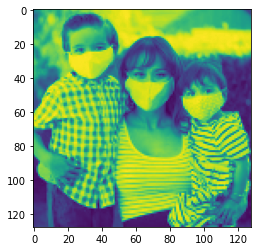

In [126]:
plt.imshow(arr_img)

In [124]:
arr_img = np.array(img)

In [1]:
arr_img.shape

NameError: name 'arr_img' is not defined

In [148]:
prediction = model.predict(features[0:2])

In [149]:
prediction

array([[0.0142966 , 0.9857034 ],
       [0.08316472, 0.91683525]], dtype=float32)